In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [12]:
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [13]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df1 = df.drop(columns='Id')

### I will create 4 new features. Two for sepal, and two for petal

In [16]:
df1['Sepal_Area'] = df1['SepalLengthCm'] * df1['SepalWidthCm']
df1['Sepal_%_Form'] = df1['SepalLengthCm'] / df1['SepalWidthCm']

df1['Petal_Area'] = df1['PetalLengthCm'] * df1['PetalWidthCm']
df1['Petal_%_Form'] = df1['PetalLengthCm'] / np.sqrt(df1['PetalWidthCm'])

df1['%Petal_Sepal'] = (0.7*df1['Petal_Area'])/(df1['SepalLengthCm']*0.3)

df1['Total_Flower_Area'] = df1['Petal_Area']+ df1['Sepal_Area']

### Now I want to plot those new features to see if they make sense

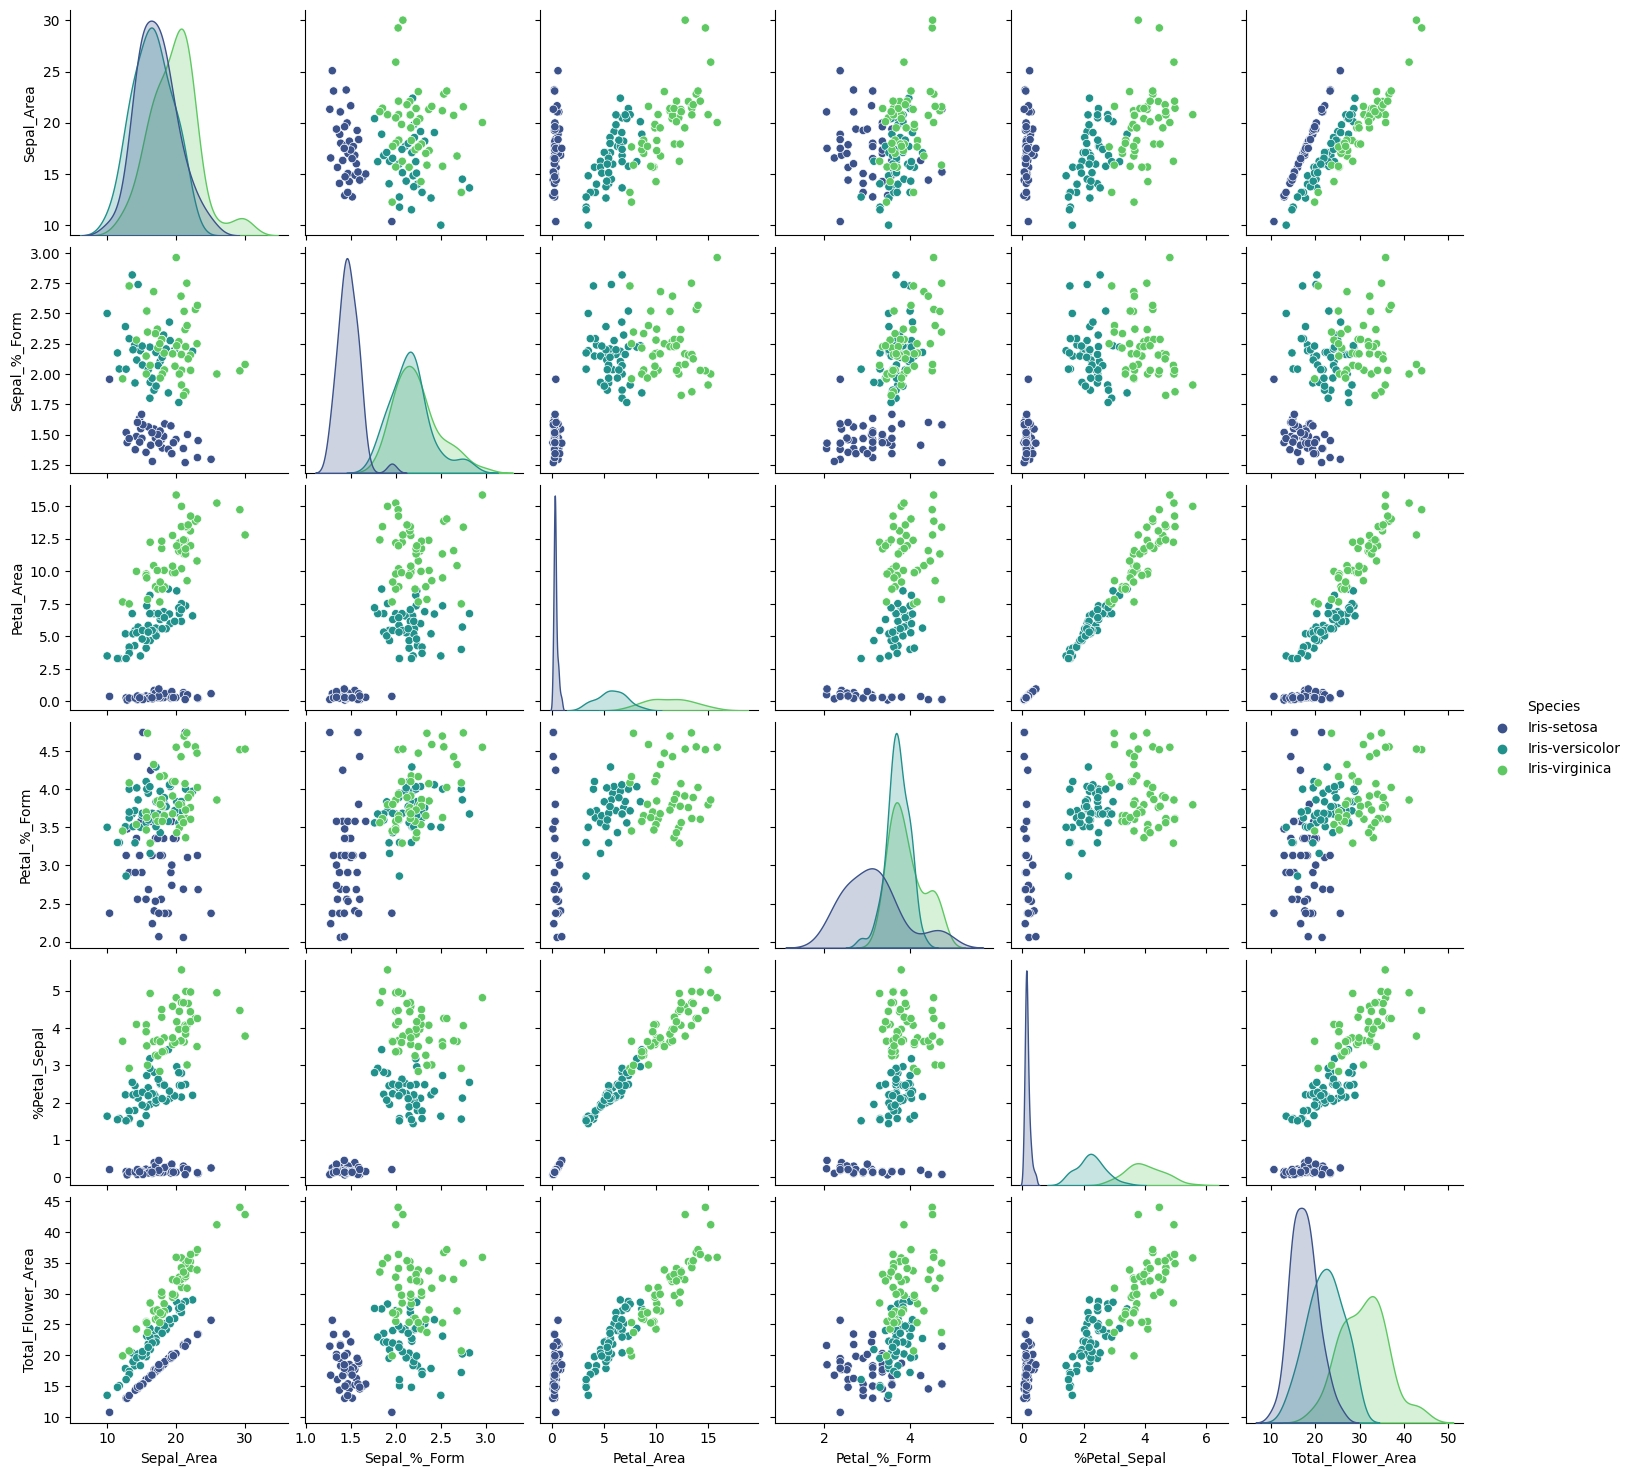

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the relevant columns
features = ['Sepal_Area', 'Sepal_%_Form', 'Petal_Area', 'Petal_%_Form','%Petal_Sepal','Total_Flower_Area', 'Species']

# Creating the pair plot
sns.pairplot(df1[features], hue='Species', palette='viridis', diag_kind='kde')

# Show the plot
plt.show()



## Creating a new df with only the most important features

In [24]:
df2 = df1[['Species', '%Petal_Sepal', 'Petal_Area']].copy()

The accuracy of the KNN is 1.0


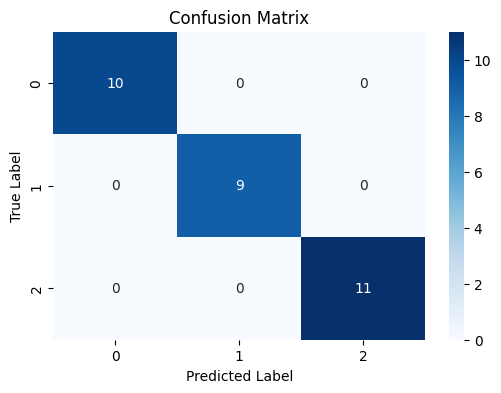

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, adjusted_rand_score, confusion_matrix
from sklearn import metrics #for checking the model accuracy



# Encoding Species for comparison later
df2['Species_Encoded'] = df2['Species'].astype('category').cat.codes  # Converts species to numerical labels

# Splitting dataset into train and test (even though clustering is unsupervised)
X_train, X_test, y_train, y_test = train_test_split(df2[['%Petal_Sepal', 'Petal_Area']], df2['Species_Encoded'], test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying K-Means clustering
kmeans = KNeighborsClassifier(n_neighbors=3)
kmeans.fit(X_train_scaled,y_train)

# Predict clusters
y_train_pred = kmeans.predict(X_train_scaled)
y_test_pred = kmeans.predict(X_test_scaled)

print('The accuracy of the KNN is',metrics.accuracy_score(y_test_pred,y_test))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### So, with the creation of new features and selection of them, we could achieve 100% accuracy on the iris dataset challenge. It's a fairly simple and small case, but it's a beginning